In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
songs_df = pd.read_csv("/Users/pnaik/Desktop/DIC_phase2/phase2_data.csv", index_col=0, sep="\t")

In [3]:
songs_df

,song_id,song_name,popularity_song,explicit,song_type,year_end_score,is_pop_song,year,rank_score,peak_position,weeks_on_chart,week,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_name,followers,popularity_artist,artist_type,main_genre,genres,is_pop_artist
0,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next",86,True,Solo,728.0,True,2018.0,100.0,100.0,7.0,2018-12-29,207320,1,1,4,0.229000,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,Ariana Grande,34554242,96.0,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",True
1,5p7ujcrUXASCNwRaWNHR1C,Without Me,87,True,Solo,1094.0,True,2018.0,99.0,99.0,11.0,2018-12-29,201661,6,1,4,0.297000,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,Halsey,7368242,90.0,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",True
2,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,85,True,Solo,2171.0,True,2018.0,98.0,100.0,20.0,2018-12-29,312820,8,1,4,0.005130,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,Travis Scott,6313709,94.0,rapper,pop,"['pop', 'pop rap', 'rap']",True
3,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,92,False,Collaboration,879.0,True,2018.0,97.0,97.0,9.0,2018-12-29,158040,2,1,4,0.556000,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911,Post Malone,16737002,96.0,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",True
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,86,False,Solo,1464.0,True,2018.0,95.0,96.0,20.0,2018-12-29,190947,5,1,4,0.193000,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,Panic! At The Disco,7749228,88.0,band,baroque pop,"['baroque pop', 'emo', 'modern rock', 'pop punk']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20400,4NnhLA66RRLXxKbiiscU9R,How Can I Be Sure - Single Version,36,False,Solo,976.0,True,1967.0,69.0,97.0,11.0,1967-11-18,175076,2,1,3,0.841000,0.231,0.455,0.000000,0.0823,-8.060,0.0296,0.391,166.705,The Young Rascals,62485,52.0,band,brill building pop,"['brill building pop', 'bubblegum pop', 'folk ...",True
20401,2jHfXdCLibrI1J56LnUAZv,To Show I Love You - Mono,1,False,Solo,8.0,False,1966.0,3.0,3.0,2.0,1966-08-06,145293,9,1,4,0.195000,0.239,0.598,0.000000,0.1140,-10.463,0.0416,0.829,199.923,Peter And Gordon,14995,43.0,duo,brill building pop,"['brill building pop', 'british blues', 'briti...",True
20402,6zqsyB7uIvWrL1iCJzpNrs,You Better Run - Single Version,20,False,Solo,480.0,True,1966.0,64.0,81.0,7.0,1966-07-30,149702,7,0,4,0.000942,0.422,0.494,0.000070,0.1740,-7.786,0.0528,0.723,116.642,The Young Rascals,62485,52.0,band,brill building pop,"['brill building pop', 'bubblegum pop', 'folk ...",True
20403,5mz9pQZZXNpAw9CdQ7Bk8q,Don't Pity Me - Mono,7,False,Solo,62.0,False,1965.0,18.0,18.0,4.0,1965-11-27,168693,1,0,4,0.619000,0.500,0.654,0.000000,0.3320,-8.633,0.0394,0.403,107.326,Peter And Gordon,14995,43.0,duo,brill building pop,"['brill building pop', 'british blues', 'briti...",True


In [4]:
songs_df.dtypes

song_id               object
song_name             object
popularity_song        int64
explicit                bool
song_type             object
year_end_score       float64
is_pop_song             bool
year                 float64
rank_score           float64
peak_position        float64
weeks_on_chart       float64
week                  object
duration_ms            int64
key                    int64
mode                   int64
time_signature         int64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
liveness             float64
loudness             float64
speechiness          float64
valence              float64
tempo                float64
artist_name           object
followers             object
popularity_artist    float64
artist_type           object
main_genre            object
genres                object
is_pop_artist           bool
dtype: object

In [5]:
songs_df.columns

Index(['song_id', 'song_name', 'popularity_song', 'explicit', 'song_type',
       'year_end_score', 'is_pop_song', 'year', 'rank_score', 'peak_position',
       'weeks_on_chart', 'week', 'duration_ms', 'key', 'mode',
       'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'artist_name', 'followers', 'popularity_artist', 'artist_type',
       'main_genre', 'genres', 'is_pop_artist'],
      dtype='object')

In [6]:
categorical_columns = [
    'song_type',
    'artist_type',
    'main_genre',
]

acoustic_categorical_columns = [
    'key',
    'mode',
    'time_signature'
]

time_cols = [
    'year'
]

bool_cols = [
    'explicit',
    'is_pop_artist',
]

other_num_columns = [
    'popularity_artist',
    'followers',
    "year_end_score"
]

acoustic_features = [
    'duration_ms',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence',
    'tempo'
]

predict_col = "rank_score"


In [7]:
songs_df[categorical_columns + acoustic_categorical_columns + bool_cols + acoustic_features + [predict_col]].describe()

,key,mode,time_signature,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,rank_score
count,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000
mean,5.225302,0.726969,3.943540,228937.153831,0.265285,0.600397,0.625057,0.047376,0.192171,-8.843792,0.067522,0.607838,120.313258,24.299666
std,3.566917,0.445527,0.289292,62968.659993,0.264401,0.150586,0.197107,0.168151,0.163649,3.591486,0.074343,0.236471,27.690074,22.473497
min,0.000000,0.000000,0.000000,24604.000000,0.000001,0.000000,0.006640,0.000000,0.013000,-30.896000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,186446.750000,0.039300,0.502000,0.481000,0.000000,0.088300,-11.216500,0.031800,0.427000,99.707750,5.000000
50%,5.000000,1.000000,4.000000,222940.000000,0.170000,0.608000,0.640000,0.000010,0.129000,-8.471000,0.040400,0.632000,118.951000,15.000000
75%,8.000000,1.000000,4.000000,259529.750000,0.440000,0.706000,0.783000,0.001100,0.248750,-6.051000,0.063000,0.804000,135.902250,44.000000
max,11.000000,1.000000,5.000000,744867.000000,0.995000,0.988000,0.998000,0.985000,0.997000,3.440000,0.950000,1.000000,231.028000,100.000000


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load data
data = songs_df[ categorical_columns + acoustic_categorical_columns + acoustic_features + [predict_col]]
data["rank_score"]= [ 1 if i >=66.5 else 0 for i in data.rank_score]

# Encode categorical columns using label encoding
le = LabelEncoder()
for col in categorical_columns :
    data[col] = le.fit_transform(data[col])

for col in acoustic_categorical_columns :
    data[col] = le.fit_transform(data[col])

# # One-hot encode categorical columns (if preferred over label encoding)
data = pd.get_dummies(data, columns=categorical_columns)
data = pd.get_dummies(data, columns=acoustic_categorical_columns)

# # data[other_num_columns] = data[other_num_columns].fillna(data[other_num_columns].mean())
# # # data[predict_col] = data[predict_col].fillna(data[predict_col].mean())

# Standardize numeric columns
scaler = StandardScaler()
# data[other_num_columns + acoustic_features] = scaler.fit_transform(data[other_num_columns + acoustic_features])
data[acoustic_features] = scaler.fit_transform(data[acoustic_features])


In [9]:
# Split data into train and test sets
X = data.drop(predict_col, axis=1)
y = data[predict_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Build logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import accuracy_score
y_pred_logreg = clf.predict(X_test)


print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy: 0.9504578155657293
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5813
           1       0.00      0.00      0.00       303

    accuracy                           0.95      6116
   macro avg       0.48      0.50      0.49      6116
weighted avg       0.90      0.95      0.93      6116



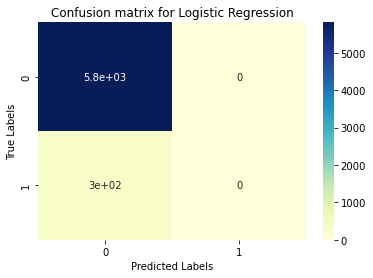

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap="YlGnBu")
plt.title("Confusion matrix for Logistic Regression")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

# Split data into train and test sets
X = data.drop(predict_col, axis=1).values.astype(np.float32)
y = data[predict_col].values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build logistic regression model
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fit Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on test set and evaluate model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# works will for 5 and > 7 neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate model on test set
score = knn.score(X_test, y_test)
print("Score:", score)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Evaluate model on test set
y_pred = xgb.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC()
svm.fit(X_train, y_train)

# Evaluate model on test set
y_pred_svm = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", score)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="YlGnBu")
plt.title("Confusion matrix for Logistic Regression")
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Fit the KMeans model
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# # Get the cluster labels and add them to the DataFrame
# data['Cluster'] = kmeans.labels_

# # Plot the clusters using a pair plot
# sns.pairplot(data, hue="Cluster")
# plt.show()

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in the reduced space using scatter plots
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot the clusters in the reduced space using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_)
plt.show()